<a href="https://colab.research.google.com/github/UKD1211/100_days_ML_cX_ISI_DS/blob/main/perceptron_trick_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import numpy as np
import pandas as pd

In [149]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=25)

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

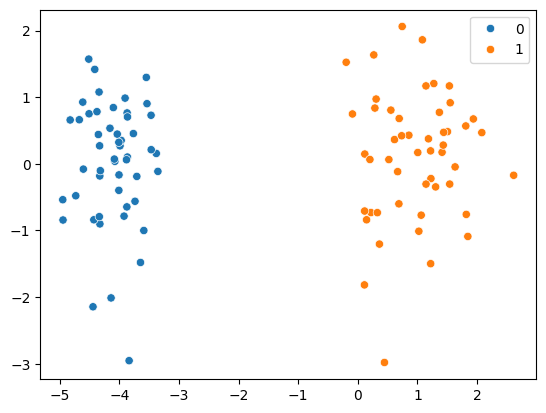

In [151]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue = y)

In [152]:
def step(y_hat):
  if y_hat >= 0:
    return 1
  else:
    return 0


def perceptron(X,y):
  X = np.insert(X,0,1,axis = 1)
  learning_rate = 0.01
  w = np.ones(X.shape[1])
  for i in range(2000):
    j = np.random.randint(1,100)
    y_hat = np.dot(w,X[j])
    w = w + learning_rate * (y[j] - step(y_hat)) * X[j]
  return w[0],w[1:]

print(perceptron(X,y))

(np.float64(1.1800000000000002), array([1.0567826 , 0.54493357]))


In [153]:
intercept_,coef_ = perceptron(X,y)

In [154]:
print(intercept_)

1.1800000000000002


In [155]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [156]:
x1 = np.linspace(-3,3,100)
y1 = m*x1 + b

(-3.0, 2.0)

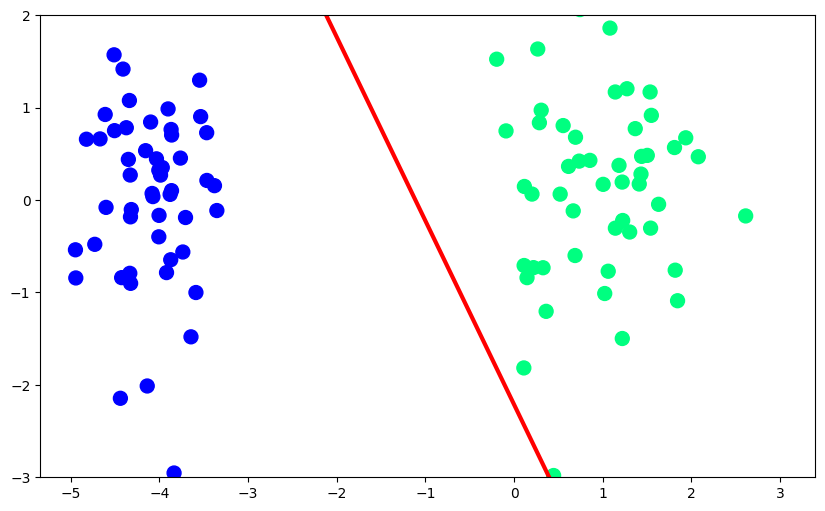

In [157]:
plt.figure(figsize=(10,6))
plt.plot(x1,y1,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
lr = LogisticRegression()

In [160]:
lr.fit(X,y)

LogisticRegression()

In [161]:
lr.coef_ = lr.coef_.ravel()

In [162]:
lr.intercept_

array([3.35797216])

In [163]:
m1 = -(lr.coef_[0]/lr.coef_[1])
b1 = -(lr.intercept_/lr.coef_[1])

In [164]:
m1

np.float64(-139.8290773852707)

In [165]:
b1

array([-232.37198866])

(-3.0, 2.0)

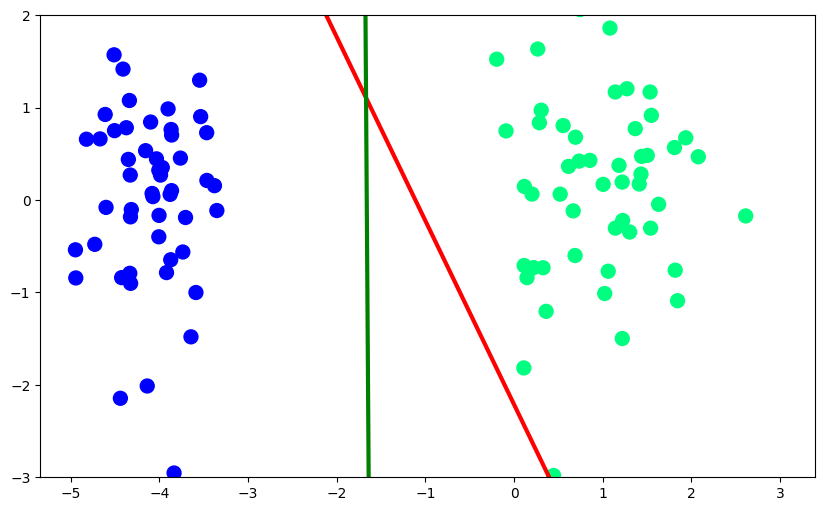

In [166]:
plt.figure(figsize=(10,6))
plt.plot(x1,y1,color='red',linewidth=3)
plt.plot(np.linspace(-3,3,100),m1*np.linspace(-3,3,100)+b1,color='green',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [168]:
#perceptron_sigmoid

def sigmoid(z):
  return 1/(1+np.exp(-z))

def perceptron_sigmoid(X,y):
  X = np.insert(X,0,1,axis = 1)
  learning_rate = 0.01
  w = np.ones(X.shape[1])
  for i in range(2000):
    j = np.random.randint(1,100)
    y_hat = np.dot(w,X[j])
    w = w + learning_rate * (y[j] - sigmoid(y_hat)) * X[j]
  return w[0],w[1:]

print(perceptron_sigmoid(X,y))

(np.float64(1.7194867522261814), array([1.8594052 , 0.35638394]))


In [169]:
intercept1_,coef1_ = perceptron_sigmoid(X,y)

In [170]:
m2 = -(coef1_[0]/coef1_[1])
b2 = -(intercept1_/coef1_[1])

(-3.0, 2.0)

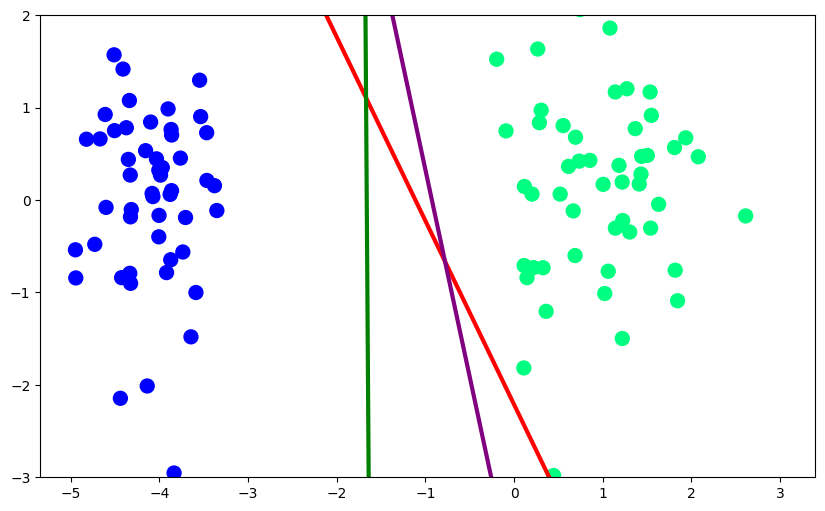

In [172]:
plt.figure(figsize = (10,6))
plt.plot(x1,y1,color='red',linewidth=3)
plt.plot(np.linspace(-3,3,100),m1*np.linspace(-3,3,100)+b1,color='green',linewidth=3)
plt.plot(np.linspace(-3,3,100),m2*np.linspace(-3,3,100)+b2,color='purple',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)